In [15]:
import sys
sys.path.append('../src')
from load_data import load_data 
from transfo_data import plot_disease_distribution, encode_target
from fonctions import split_data,cross_validate_models,train_and_evaluate_model,final_model_training,evaluate_test_data,create_symptom_dict,predict_disease
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Chargement des jeux de données
train_data = load_data("../data/Training.csv")
test_data = load_data("../data/Testing.csv")

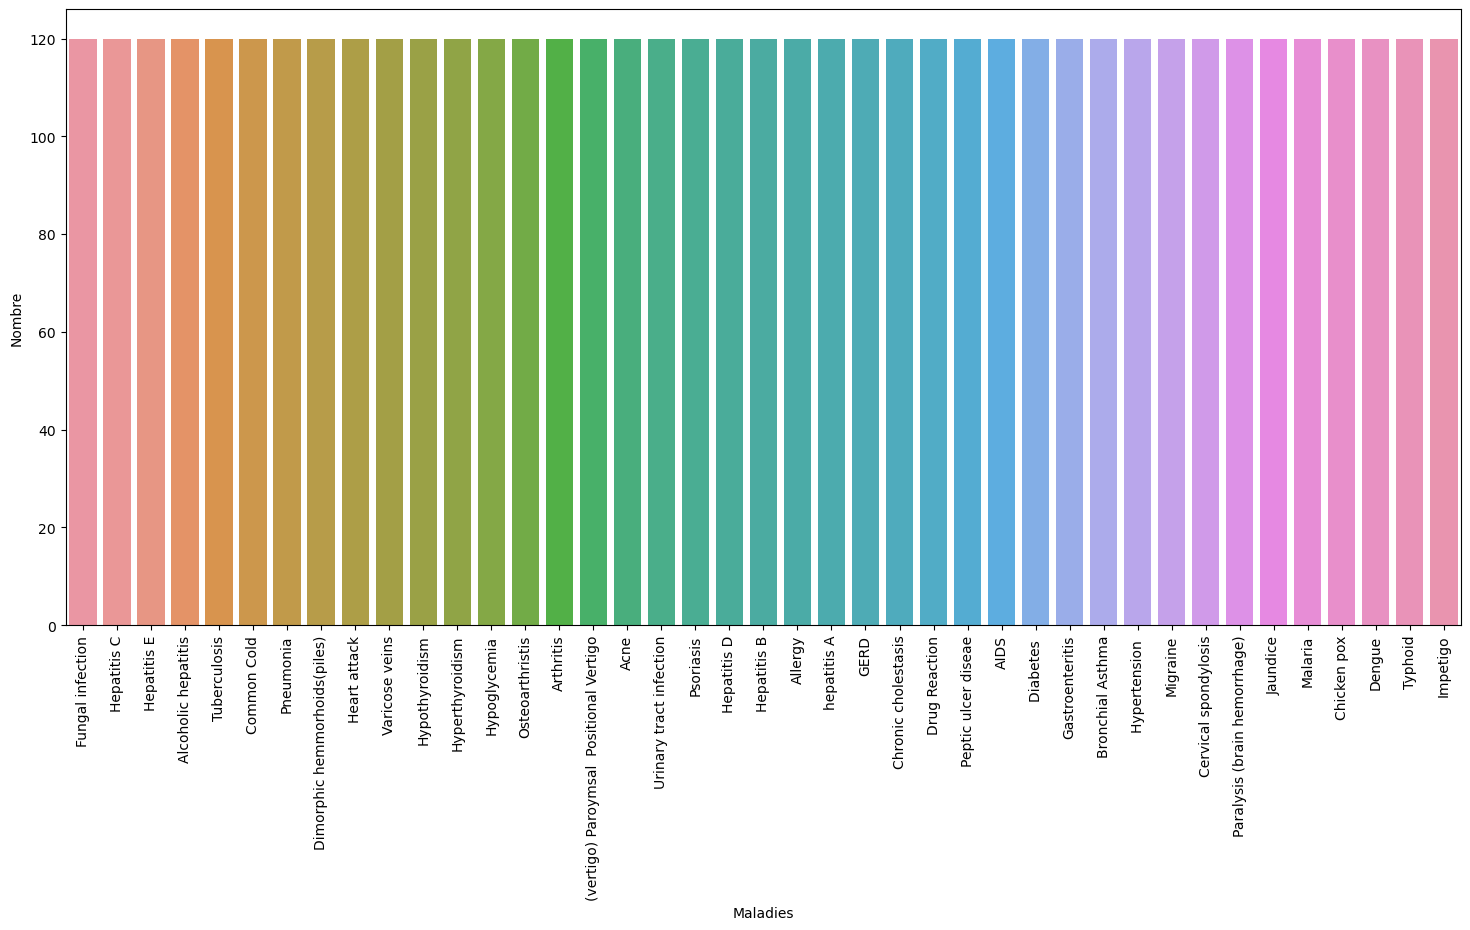

In [17]:
# Visualisation de la distribution des maladies sur le jeu d'entraînement
plot_disease_distribution(train_data)

In [18]:
# Encodage des données
train_data, encoding = encode_target(train_data)
X_train, X_test, y_train, y_test = split_data(train_data)

In [19]:
# Création des modèles
models = {
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=18)
}

In [20]:
# Validation croisée sur les modèles
cross_validate_models(models, X_train, y_train)

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy sur les données d'entrainement : 100.0
Accuracy sur les données de test : 100.0


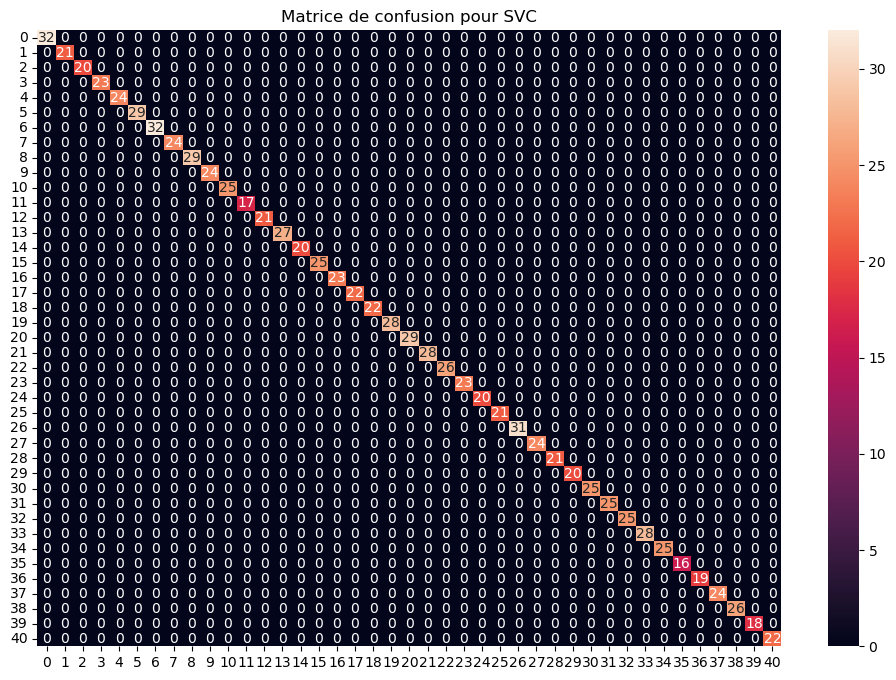

Accuracy sur les données d'entrainement : 100.0
Accuracy sur les données de test : 100.0


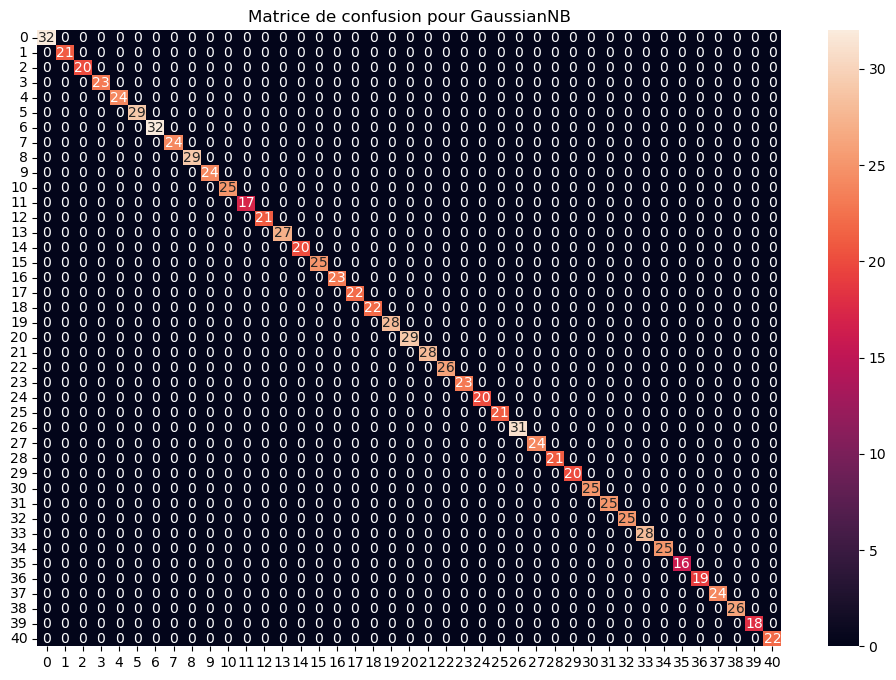

Accuracy sur les données d'entrainement : 100.0
Accuracy sur les données de test : 100.0


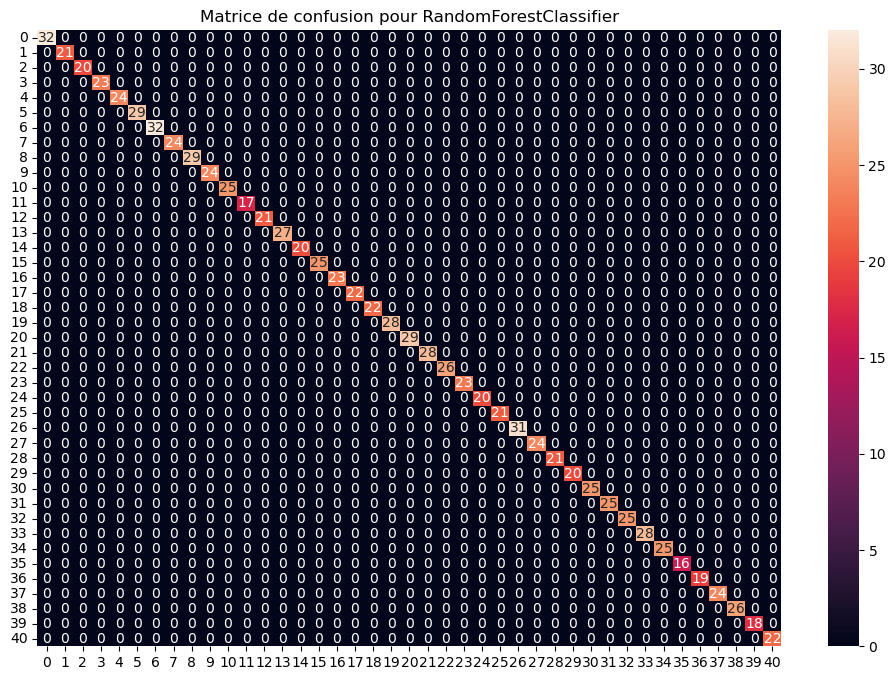

In [21]:
# Entraînement et évaluation des modèles
train_and_evaluate_model(SVC(), X_train, y_train, X_test, y_test)
train_and_evaluate_model(GaussianNB(), X_train, y_train, X_test, y_test)
train_and_evaluate_model(RandomForestClassifier(random_state=18), X_train, y_train, X_test, y_test)

In [22]:
# Entraînement final des modèles sur l'ensemble des données d'entraînement
final_svm_model, final_nb_model, final_rf_model = final_model_training(X_train, y_train)

In [23]:
# Évaluation sur le jeu de données de test
evaluate_test_data(test_data, final_svm_model, final_nb_model, final_rf_model, encoding)

TypeError: argument of type 'method' is not iterable

In [ ]:
# Création du dictionnaire de symptômes
symptom_index = create_symptom_dict(X_train)

In [ ]:
# Exemple de prédiction
predictions = predict_disease("Itching,Skin Rash,Nodal Skin Eruptions", symptom_index, final_rf_model, final_nb_model, final_svm_model, encoding.classes_)
print(predictions)